In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore') #, "\nPyarrow", DeprecationWarning)

In [9]:
file1 = r'datasettt.csv'
df = pd.read_csv(file1)
dataset = df.values
X = dataset[:, 0]
Y = dataset[:, 1]
data = list(zip(X, Y))
print(data)


[(0.0, 70.79357057401127), (1.0, 70.7954916762551), (2.0, 70.7954916762551), (3.0, 70.79768548307777), (4.0, 70.79768548307777), (5.0, 70.80017489278251), (6.0, 70.80017489278251), (7.0, 70.80239236996246), (8.0, 70.80239236996246), (9.0, 70.80481099438428), (10.0, 70.80481099438428), (11.0, 70.80721016944338), (12.0, 70.80721016944338), (13.0, 70.80949105475769), (14.0, 70.80949105475769), (15.0, 70.80971529077493), (16.0, 70.81171814737459), (17.0, 70.81407290766546), (18.0, 70.81407290766546), (19.0, 70.81505812432003), (20.0, 70.81633881021327), (21.0, 70.81633881021327), (22.0, 70.81863579291416), (23.0, 70.81863579291416), (24.0, 70.81925093923518), (25.0, 70.82095877235577), (26.0, 70.82095877235577), (27.0, 70.82312166687456), (28.0, 70.82312166687456), (29.0, 70.82549578360835), (30.0, 70.82549578360835), (31.0, 70.82579233507282), (32.0, 70.8278557687427), (33.0, 70.8278557687427), (34.0, 70.83006485371834), (35.0, 70.83006485371834), (36.0, 70.8325159903866), (37.0, 70.83251

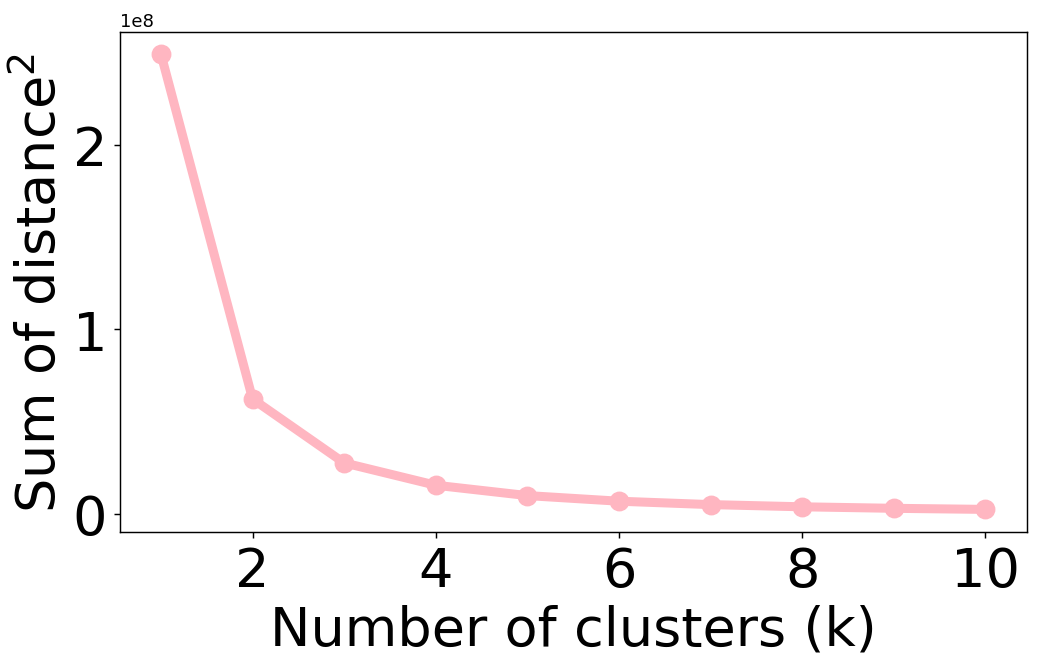

In [10]:
inertias = []

for i in range(1,11):
    #kmeans = KMeans(n_clusters=i)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(9, 5), dpi=130)
plt.subplot().tick_params(labelsize=30)

plt.plot(range(1,11), inertias, marker='o', markersize=10, color='lightpink', linewidth=5)
plt.xlabel('Number of clusters (k)', fontsize=30)
plt.ylabel('Sum of distance$^2$', fontsize=30)
#plt.show()
plt.savefig("number_of_cpu_cluster_centroids.pdf", format="pdf", bbox_inches="tight")

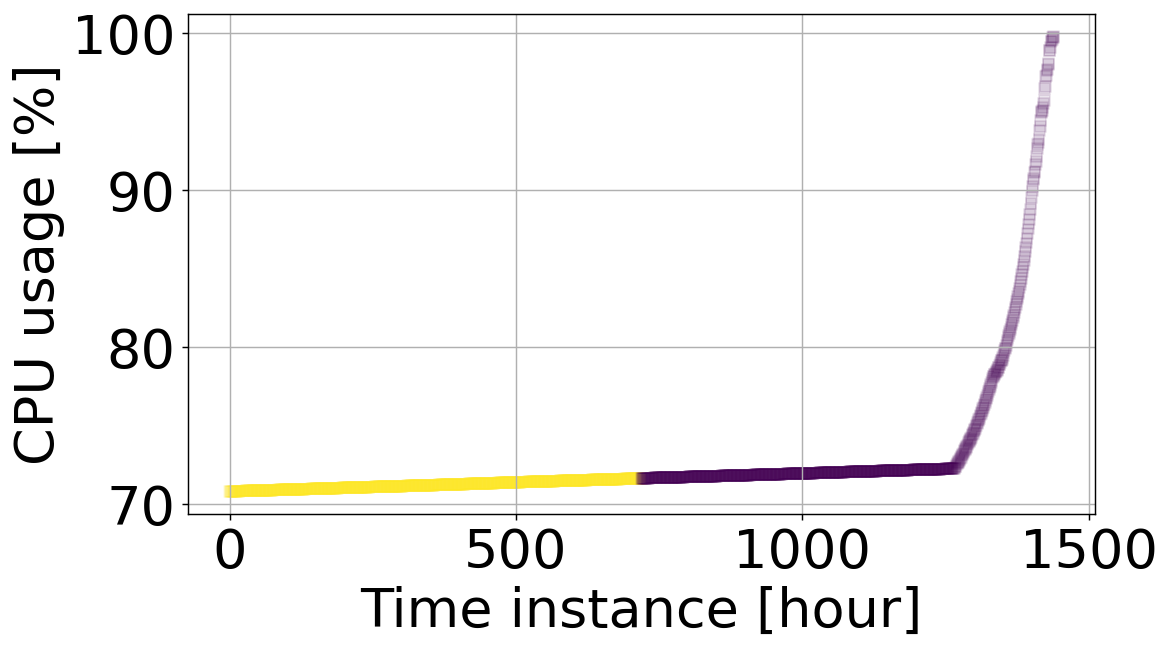

In [15]:
#kmeans = KMeans(n_clusters=2)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(data)
# k_means_labels = k_means.labels_
# k_means_cluster_centers = k_means.cluster_centers_
# k_means_labels_unique = np.unique(k_means_labels)

fig, ax = plt.subplots(figsize=(9, 5), dpi=130)
plt.subplot().tick_params(labelsize=30)
plt.xlabel('Time instance [hour]', fontsize=30)
plt.ylabel('CPU usage [%]', fontsize=30)
plt.scatter(X, Y, c=kmeans.labels_, marker="s",alpha=0.1)
plt.grid(True)

#plt.show()
plt.savefig("k-means_labels.pdf", format="pdf", bbox_inches="tight")